In [1]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',200)
%matplotlib inline

In [2]:
Data_Path = "C:\\Users\\Muskan\\Downloads\\For_modeling.csv"

In [3]:
data = pd.read_csv(Data_Path,
                  dtype={
                      'Duration':'int8',
                      'Distance':'int8',
                      'PLong':'float32',
                      'PLatd':'float32',
                      'DLong':'float32',
                      'DLatd':'float32',
                      'Haversine':'float32',
                      'Pmonth':'int8',
                      'Pday':'int8',
                      'Phour':'int8',
                      'Pmin':'int8',
                      'PDweek':'int8',
                      'Dmonth':'int8',
                      'Dday':'int8',
                      'Dhour':'int8',
                      'Dmin':'int8',
                      'DDweek':'int8',
                      'Temp':'float32',
                      'Precip':'float32',
                      'Wind':'float32',
                      'Humid':'float32',
                      'Solar':'float32',
                      'Snow':'float32',
                      'GroundTemp':'float32',
                      'Dust':'float32'                      
                  },
                   index_col = 0
                  ).sample(frac=1)
data.head()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
3127709,15,-128,37.591160,126.941330,37.583698,126.924965,1.663661,6,20,15,38,2,6,20,15,55,2,27.9,0.0,3.6,45.0,3.04,0.0,50.000000,37.0
9358997,9,24,37.531811,127.080742,37.539139,127.070618,1.208654,12,1,19,31,5,12,1,19,41,5,6.8,0.0,1.2,37.0,0.00,0.0,1.400000,50.0
4356490,4,-32,37.552914,126.836571,37.548908,126.836563,0.445448,7,25,0,26,2,7,25,0,31,2,28.9,0.0,2.2,66.0,0.00,0.0,28.299999,16.0
4807585,11,-24,37.649021,127.076408,37.638649,127.066292,1.457206,8,8,10,14,2,8,8,10,26,2,31.6,0.0,2.3,58.0,2.02,0.0,40.400002,18.0
5133106,58,10,37.573753,127.038536,37.567970,127.046890,0.977542,8,17,20,31,4,8,17,21,30,4,28.4,0.0,1.7,40.0,0.00,0.0,28.200001,15.0


In [4]:
data.columns

Index(['Duration', 'Distance', 'PLong', 'PLatd', 'DLong', 'DLatd', 'Haversine',
       'Pmonth', 'Pday', 'Phour', 'Pmin', 'PDweek', 'Dmonth', 'Dday', 'Dhour',
       'Dmin', 'DDweek', 'Temp', 'Precip', 'Wind', 'Humid', 'Solar', 'Snow',
       'GroundTemp', 'Dust'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9601139 entries, 3127709 to 7340835
Data columns (total 25 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Duration    int8   
 1   Distance    int8   
 2   PLong       float32
 3   PLatd       float32
 4   DLong       float32
 5   DLatd       float32
 6   Haversine   float32
 7   Pmonth      int8   
 8   Pday        int8   
 9   Phour       int8   
 10  Pmin        int8   
 11  PDweek      int8   
 12  Dmonth      int8   
 13  Dday        int8   
 14  Dhour       int8   
 15  Dmin        int8   
 16  DDweek      int8   
 17  Temp        float32
 18  Precip      float32
 19  Wind        float32
 20  Humid       float32
 21  Solar       float32
 22  Snow        float32
 23  GroundTemp  float32
 24  Dust        float32
dtypes: float32(13), int8(12)
memory usage: 659.3 MB


In [6]:
data = data.reset_index().drop(columns = ["index"])

In [7]:
data.head()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,15,-128,37.591160,126.941330,37.583698,126.924965,1.663661,6,20,15,38,2,6,20,15,55,2,27.9,0.0,3.6,45.0,3.04,0.0,50.000000,37.0
1,9,24,37.531811,127.080742,37.539139,127.070618,1.208654,12,1,19,31,5,12,1,19,41,5,6.8,0.0,1.2,37.0,0.00,0.0,1.400000,50.0
2,4,-32,37.552914,126.836571,37.548908,126.836563,0.445448,7,25,0,26,2,7,25,0,31,2,28.9,0.0,2.2,66.0,0.00,0.0,28.299999,16.0
3,11,-24,37.649021,127.076408,37.638649,127.066292,1.457206,8,8,10,14,2,8,8,10,26,2,31.6,0.0,2.3,58.0,2.02,0.0,40.400002,18.0
4,58,10,37.573753,127.038536,37.567970,127.046890,0.977542,8,17,20,31,4,8,17,21,30,4,28.4,0.0,1.7,40.0,0.00,0.0,28.200001,15.0


In [8]:
data.shape

(9601139, 25)

In [9]:
data.describe()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
count,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06
mean,2.580294e+01,-9.069010e-01,3.432563e+01,1.279721e+02,3.432562e+01,1.279721e+02,1.873383e+00,7.578754e+00,1.576714e+01,1.437801e+01,2.914948e+01,2.943812e+00,7.579198e+00,1.576666e+01,1.442620e+01,2.999278e+01,2.945771e+00,1.856949e+01,1.784736e-02,1.817973e+00,5.383981e+01,7.273650e-01,9.947880e-03,2.073747e+01,3.245763e+01
std,2.504333e+01,7.404757e+01,3.137749e+00,9.872790e-01,3.137857e+00,9.873629e-01,1.984857e+00,2.696797e+00,8.748012e+00,6.249244e+00,1.725837e+01,1.976063e+00,2.696781e+00,8.747788e+00,6.484493e+00,1.730960e+01,1.977624e+00,9.435693e+00,3.732301e-01,9.633301e-01,1.727707e+01,9.099017e-01,1.625093e-01,1.255545e+01,2.381883e+01
min,1.000000e+00,-1.280000e+02,3.743727e+01,1.267986e+02,3.743727e+01,1.267986e+02,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.780000e+01,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,-1.360000e+01,0.000000e+00
25%,8.000000e+00,-6.600000e+01,3.751424e+01,1.269200e+02,3.751424e+01,1.269194e+02,6.758669e-01,6.000000e+00,8.000000e+00,1.000000e+01,1.400000e+01,1.000000e+00,6.000000e+00,8.000000e+00,1.000000e+01,1.500000e+01,1.000000e+00,1.220000e+01,0.000000e+00,1.100000e+00,4.100000e+01,0.000000e+00,0.000000e+00,1.160000e+01,1.600000e+01
50%,1.600000e+01,0.000000e+00,3.754693e+01,1.269943e+02,3.754655e+01,1.269947e+02,1.257498e+00,8.000000e+00,1.600000e+01,1.600000e+01,2.900000e+01,3.000000e+00,8.000000e+00,1.600000e+01,1.600000e+01,3.000000e+01,3.000000e+00,2.010000e+01,0.000000e+00,1.700000e+00,5.300000e+01,2.700000e-01,0.000000e+00,2.110000e+01,2.700000e+01
75%,3.600000e+01,6.400000e+01,3.757324e+01,1.270618e+02,3.757324e+01,1.270624e+02,2.363812e+00,1.000000e+01,2.300000e+01,1.900000e+01,4.400000e+01,5.000000e+00,1.000000e+01,2.300000e+01,2.000000e+01,4.500000e+01,5.000000e+00,2.550000e+01,0.000000e+00,2.400000e+00,6.700000e+01,1.260000e+00,0.000000e+00,2.850000e+01,4.200000e+01
max,1.190000e+02,1.260000e+02,3.768972e+01,1.271803e+02,3.768972e+01,1.271803e+02,2.863448e+01,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,6.000000e+00,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,6.000000e+00,3.940000e+01,3.500000e+01,7.400000e+00,9.800000e+01,3.520000e+00,8.800000e+00,6.220000e+01,3.040000e+02


# Observations
There are data points where haversine is 0 and there are data points where distance is -ve.

In [10]:
data.shape

(9601139, 25)

In [11]:
data[data['Haversine']==0]

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
18,70,-76,37.542347,126.943024,37.542347,126.943024,0.0,9,27,18,49,3,9,27,20,0,3,22.500000,0.0,0.8,38.0,0.31,0.0,21.000000,22.0
29,49,2,37.521275,127.061035,37.521275,127.061035,0.0,5,9,19,35,2,5,9,20,26,2,18.799999,0.0,2.8,47.0,0.40,0.0,19.200001,35.0
33,19,-32,37.490540,127.008163,37.490540,127.008163,0.0,12,14,13,4,4,12,14,13,26,4,-0.900000,0.0,2.2,32.0,1.80,0.0,7.800000,29.0
118,20,-118,37.499470,126.868401,37.499470,126.868401,0.0,7,13,16,23,4,7,13,16,43,4,30.000000,0.0,2.0,67.0,1.46,0.0,32.400002,11.0
120,8,126,37.665249,127.057892,37.665249,127.057892,0.0,11,28,22,29,2,11,28,22,38,2,3.200000,0.0,1.3,34.0,0.00,0.0,-0.100000,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9601116,44,-20,37.486767,127.046761,37.486767,127.046761,0.0,8,23,18,33,3,8,23,19,18,3,30.600000,0.0,2.3,55.0,0.11,0.0,31.200001,8.0
9601125,89,94,37.653015,127.046997,37.653015,127.046997,0.0,11,13,17,21,1,11,13,18,52,1,12.700000,0.0,1.9,40.0,0.33,0.0,9.900000,26.0
9601129,53,-30,37.516598,127.009590,37.516598,127.009590,0.0,10,21,19,39,6,10,21,20,33,6,14.900000,0.0,1.4,46.0,0.00,0.0,12.300000,22.0
9601131,114,64,37.520336,126.994263,37.520336,126.994263,0.0,9,2,15,48,6,9,2,17,43,6,29.299999,0.0,1.5,43.0,2.40,0.0,43.900002,12.0


In [12]:
data[data['Haversine']==0].shape

(955083, 25)

In [13]:
9601139-955083

8646056

In [14]:
count = 0
for values in data[data['Haversine']==0][["PLong","DLong","PLatd","DLatd"]].values:
    if values[0]!=values[1] or values[2]!=values[3]:
        print(values)
        count+=1
print(f"Total data points with unequal longitude and latitude: {count}")

Total data points with unequal longitude and latitude: 0


In [15]:
data = data[data['Haversine']!=0].reset_index().drop(columns=['index'])

In [16]:
data.head()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,15,-128,37.591160,126.941330,37.583698,126.924965,1.663661,6,20,15,38,2,6,20,15,55,2,27.9,0.0,3.6,45.0,3.04,0.0,50.000000,37.0
1,9,24,37.531811,127.080742,37.539139,127.070618,1.208654,12,1,19,31,5,12,1,19,41,5,6.8,0.0,1.2,37.0,0.00,0.0,1.400000,50.0
2,4,-32,37.552914,126.836571,37.548908,126.836563,0.445448,7,25,0,26,2,7,25,0,31,2,28.9,0.0,2.2,66.0,0.00,0.0,28.299999,16.0
3,11,-24,37.649021,127.076408,37.638649,127.066292,1.457206,8,8,10,14,2,8,8,10,26,2,31.6,0.0,2.3,58.0,2.02,0.0,40.400002,18.0
4,58,10,37.573753,127.038536,37.567970,127.046890,0.977542,8,17,20,31,4,8,17,21,30,4,28.4,0.0,1.7,40.0,0.00,0.0,28.200001,15.0


In [17]:
data.shape

(8646056, 25)

Exploring Data Points where Distance is -ve

In [18]:
data[data['Distance']<0]

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,15,-128,37.591160,126.941330,37.583698,126.924965,1.663661,6,20,15,38,2,6,20,15,55,2,27.900000,0.0,3.6,45.0,3.04,0.0,50.000000,37.0
2,4,-32,37.552914,126.836571,37.548908,126.836563,0.445448,7,25,0,26,2,7,25,0,31,2,28.900000,0.0,2.2,66.0,0.00,0.0,28.299999,16.0
3,11,-24,37.649021,127.076408,37.638649,127.066292,1.457206,8,8,10,14,2,8,8,10,26,2,31.600000,0.0,2.3,58.0,2.02,0.0,40.400002,18.0
7,13,-128,37.541412,126.840225,37.528919,126.848083,1.552370,6,8,15,35,4,6,8,15,50,4,26.200001,0.0,3.3,51.0,2.87,0.0,51.099998,30.0
9,26,-112,37.524666,126.918022,37.504566,126.910233,2.338220,7,14,20,49,5,7,14,21,16,5,29.200001,0.0,1.7,63.0,0.10,0.0,28.400000,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8646047,7,-52,37.545231,127.084732,37.540089,127.073746,1.124765,3,26,20,2,0,3,26,20,10,0,12.900000,0.0,2.8,42.0,0.00,0.0,9.500000,49.0
8646049,11,-120,37.556000,126.973358,37.542320,126.961960,1.823071,2,20,11,19,1,2,20,11,30,1,2.800000,0.0,3.9,35.0,1.71,0.0,2.700000,75.0
8646051,6,-120,37.580406,127.044823,37.574852,127.040306,0.734748,8,25,23,11,5,8,25,23,18,5,22.900000,0.0,1.4,78.0,0.00,0.0,20.900000,10.0
8646053,31,-48,37.524120,126.936546,37.556789,126.935883,3.633102,6,12,17,57,1,6,12,18,28,1,26.400000,0.0,3.0,47.0,1.76,0.0,37.000000,17.0


In [19]:
data[data['Distance']<0].shape

(4319967, 25)

In [20]:
data['Distance'] = data['Distance'].apply(lambda x: abs(x))

In [21]:
data[data['Distance']<0].shape

(0, 25)

In [22]:
data.shape

(8646056, 25)

Exploring Data Points where Distance is 0

In [23]:
data[data['Distance']==0]

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
183,11,0,37.574852,127.040306,37.573086,127.052162,1.063156,5,21,8,2,0,5,21,8,14,0,15.300000,0.0,1.3,30.0,1.30,0.0,18.299999,6.0
232,29,0,37.528263,126.896629,37.484661,126.903900,4.890566,12,3,18,53,0,12,3,19,24,0,13.300000,1.5,2.3,98.0,0.00,0.0,11.400000,49.0
262,45,0,37.512959,126.952072,37.526989,126.932098,2.353073,3,30,20,22,4,3,30,21,10,4,14.300000,0.0,2.6,63.0,0.00,0.0,12.600000,12.0
281,21,0,37.602402,126.928650,37.617802,126.921967,1.810767,9,9,23,18,6,9,9,23,40,6,21.200001,0.0,2.5,56.0,0.00,0.0,20.100000,8.0
371,23,0,37.551567,126.902847,37.590797,126.913651,4.464897,6,29,18,6,4,6,29,18,30,4,28.100000,0.0,1.9,60.0,1.05,0.0,28.000000,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8645412,22,0,37.569183,127.009880,37.582592,127.028976,2.248378,12,26,17,51,2,12,26,18,15,2,-0.800000,0.0,2.7,18.0,0.31,0.0,0.500000,30.0
8645768,57,0,37.626614,127.072754,37.643757,127.064987,2.025200,6,15,0,35,4,6,15,1,33,4,21.000000,0.0,0.9,70.0,0.00,0.0,18.700001,6.0
8645836,53,0,37.514088,127.099030,37.524071,127.021790,6.901990,6,25,19,12,0,6,25,20,6,0,29.799999,0.0,1.5,45.0,0.32,0.0,31.200001,66.0
8645902,28,0,37.531399,126.863609,37.532803,126.863930,0.158663,11,25,3,16,6,11,25,3,44,6,2.600000,0.0,0.9,88.0,0.00,2.8,0.300000,45.0


In [24]:
data[data['Distance']==0].shape

(62196, 25)

In [25]:
data= data[data['Distance']!=0].reset_index().drop(columns='index')

In [26]:
data.head()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,15,128,37.591160,126.941330,37.583698,126.924965,1.663661,6,20,15,38,2,6,20,15,55,2,27.9,0.0,3.6,45.0,3.04,0.0,50.000000,37.0
1,9,24,37.531811,127.080742,37.539139,127.070618,1.208654,12,1,19,31,5,12,1,19,41,5,6.8,0.0,1.2,37.0,0.00,0.0,1.400000,50.0
2,4,32,37.552914,126.836571,37.548908,126.836563,0.445448,7,25,0,26,2,7,25,0,31,2,28.9,0.0,2.2,66.0,0.00,0.0,28.299999,16.0
3,11,24,37.649021,127.076408,37.638649,127.066292,1.457206,8,8,10,14,2,8,8,10,26,2,31.6,0.0,2.3,58.0,2.02,0.0,40.400002,18.0
4,58,10,37.573753,127.038536,37.567970,127.046890,0.977542,8,17,20,31,4,8,17,21,30,4,28.4,0.0,1.7,40.0,0.00,0.0,28.200001,15.0


In [27]:
data.shape

(8583860, 25)

In [28]:
data.describe()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
count,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06
mean,2.312955e+01,6.469965e+01,3.460125e+01,1.279688e+02,3.460123e+01,1.279688e+02,2.079801e+00,7.602144e+00,1.578074e+01,1.423189e+01,2.912872e+01,2.916530e+00,7.602541e+00,1.578033e+01,1.427437e+01,3.003426e+01,2.918544e+00,1.836504e+01,1.813634e-02,1.804311e+00,5.417071e+01,7.089342e-01,1.020993e-02,2.044662e+01,3.250593e+01
std,2.286273e+01,3.668851e+01,2.865924e+00,9.828622e-01,2.866004e+00,9.830610e-01,1.985557e+00,2.711003e+00,8.746162e+00,6.334664e+00,1.725810e+01,1.963892e+00,2.710989e+00,8.745929e+00,6.534876e+00,1.730503e+01,1.965265e+00,9.535374e+00,3.796489e-01,9.658411e-01,1.732271e+01,9.048961e-01,1.645083e-01,1.262057e+01,2.391692e+01
min,1.000000e+00,1.000000e+00,3.743727e+01,1.267986e+02,3.743727e+01,1.267986e+02,2.088959e-02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.780000e+01,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,-1.360000e+01,0.000000e+00
25%,7.000000e+00,3.200000e+01,3.751424e+01,1.269201e+02,3.751424e+01,1.269196e+02,8.264499e-01,6.000000e+00,8.000000e+00,9.000000e+00,1.400000e+01,1.000000e+00,6.000000e+00,8.000000e+00,9.000000e+00,1.500000e+01,1.000000e+00,1.200000e+01,0.000000e+00,1.100000e+00,4.100000e+01,0.000000e+00,0.000000e+00,1.120000e+01,1.600000e+01
50%,1.400000e+01,6.400000e+01,3.754769e+01,1.269943e+02,3.754707e+01,1.269943e+02,1.404485e+00,8.000000e+00,1.600000e+01,1.600000e+01,2.900000e+01,3.000000e+00,8.000000e+00,1.600000e+01,1.600000e+01,3.000000e+01,3.000000e+00,1.990000e+01,0.000000e+00,1.700000e+00,5.300000e+01,2.500000e-01,0.000000e+00,2.090000e+01,2.700000e+01
75%,3.100000e+01,9.600000e+01,3.757324e+01,1.270618e+02,3.757328e+01,1.270624e+02,2.554889e+00,1.000000e+01,2.300000e+01,1.900000e+01,4.400000e+01,5.000000e+00,1.000000e+01,2.300000e+01,1.900000e+01,4.500000e+01,5.000000e+00,2.540000e+01,0.000000e+00,2.400000e+00,6.700000e+01,1.230000e+00,0.000000e+00,2.840000e+01,4.200000e+01
max,1.190000e+02,1.280000e+02,3.768972e+01,1.271803e+02,3.768972e+01,1.271803e+02,2.863448e+01,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,6.000000e+00,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,6.000000e+00,3.940000e+01,3.500000e+01,7.400000e+00,9.800000e+01,3.520000e+00,8.800000e+00,6.220000e+01,3.040000e+02


In [29]:
month_info = data["Pmonth"].value_counts()

In [30]:
month_info

10    1220276
9     1207581
6      982218
7      933276
8      875010
11     856022
5      796776
4      576777
12     453142
3      392177
2      146360
1      144245
Name: Pmonth, dtype: int64

In [31]:
month_labels = ['Jan', 'Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec']

Text(0.5, 1.0, 'Total pickups every months in a year')

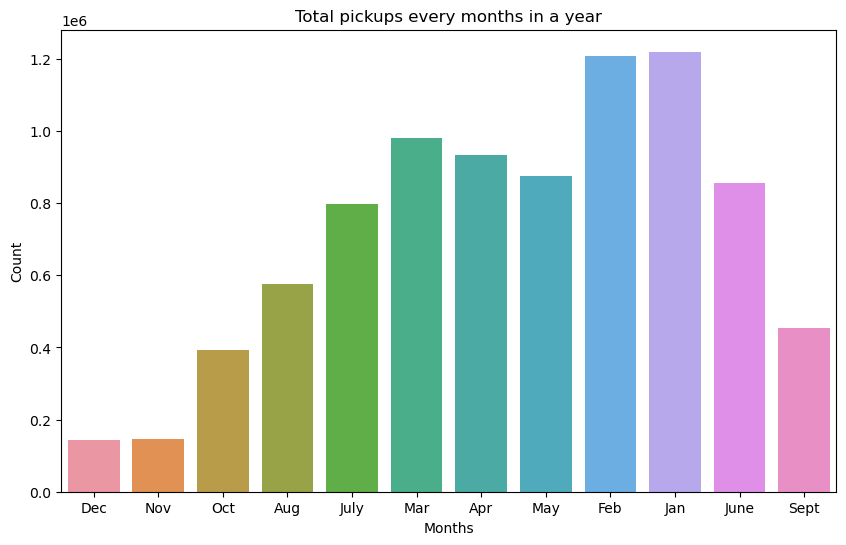

In [32]:
pick_up_months = month_info.index
trips_count = month_info.values

plt.figure(figsize=(10,6))
sns.barplot(x=pick_up_months, y=trips_count)
plt.xlabel("Months")
plt.ylabel("Count")
plt.xticks(pick_up_months-1, month_labels)
plt.title("Total pickups every months in a year")

Text(0.5, 1.0, 'Avg Trip Duration in each month')

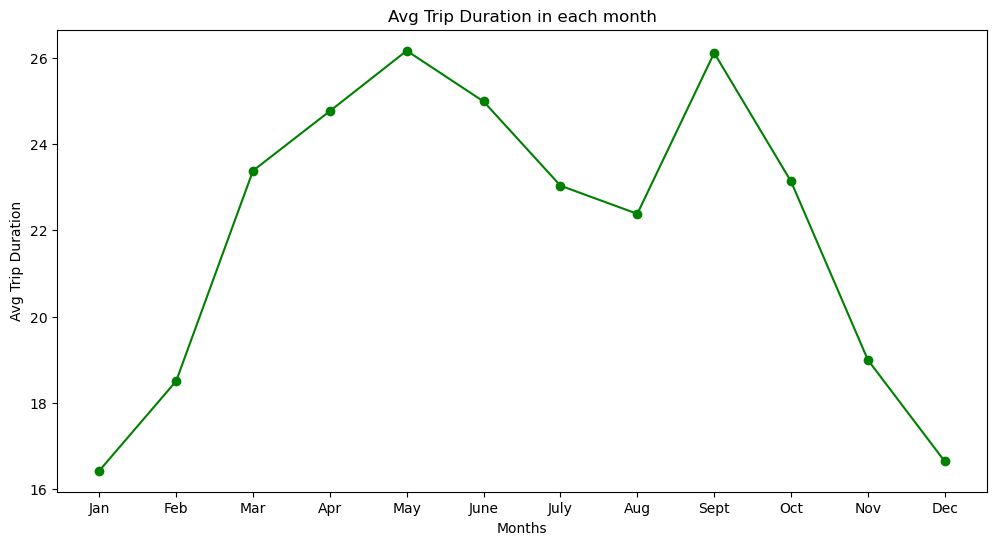

In [33]:
temp_data =  data.groupby("Pmonth")['Duration'].mean()
pick_up_months = temp_data.index
avg_duration = temp_data.values
plt.figure(figsize=(12,6))
plt.plot(pick_up_months, avg_duration,'g-o')
plt.xlabel("Months")
plt.ylabel("Avg Trip Duration")
plt.xticks(pick_up_months, month_labels)
plt.title("Avg Trip Duration in each month")

Text(0.5, 1.0, 'Avg Trip Duration in each DAy of week')

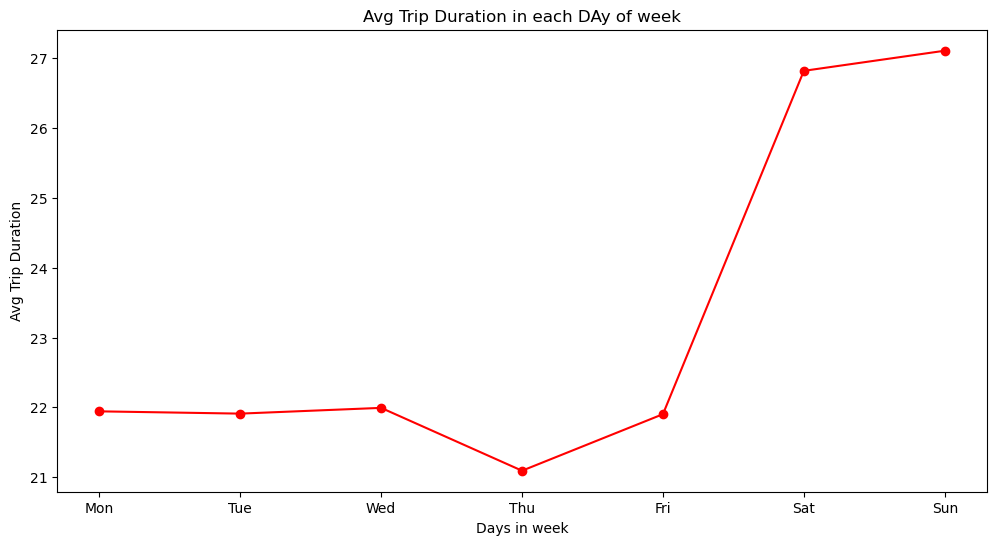

In [34]:
temp_data =  data.groupby("PDweek")['Duration'].mean()
day_labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
plt.figure(figsize=(12,6))
plt.plot(temp_data.index, temp_data.values,'r-o')
plt.xlabel("Days in week")
plt.ylabel("Avg Trip Duration")
plt.xticks(temp_data.index, day_labels)
plt.title("Avg Trip Duration in each DAy of week")

Text(0.5, 1.0, 'Avg Trip Duration on each DAy ')

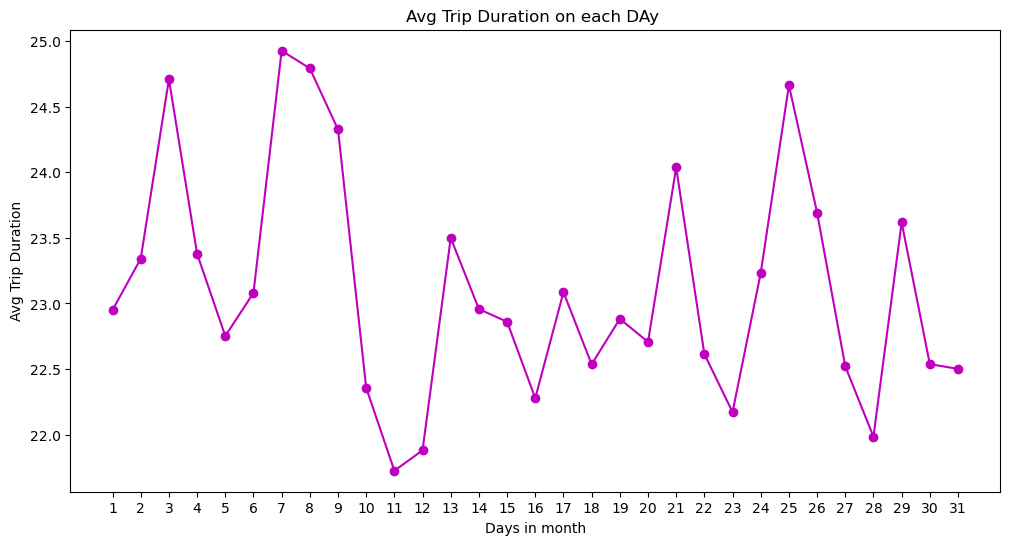

In [35]:
temp_data =  data.groupby("Pday")['Duration'].mean()
plt.figure(figsize=(12,6))
plt.plot(temp_data.index, temp_data.values,'m-o')
plt.xlabel("Days in month")
plt.ylabel("Avg Trip Duration")
plt.xticks(ticks=range(1,32))
plt.title("Avg Trip Duration on each DAy ")

Text(0.5, 1.0, 'Avg Trip Duration on each hour in a DAY ')

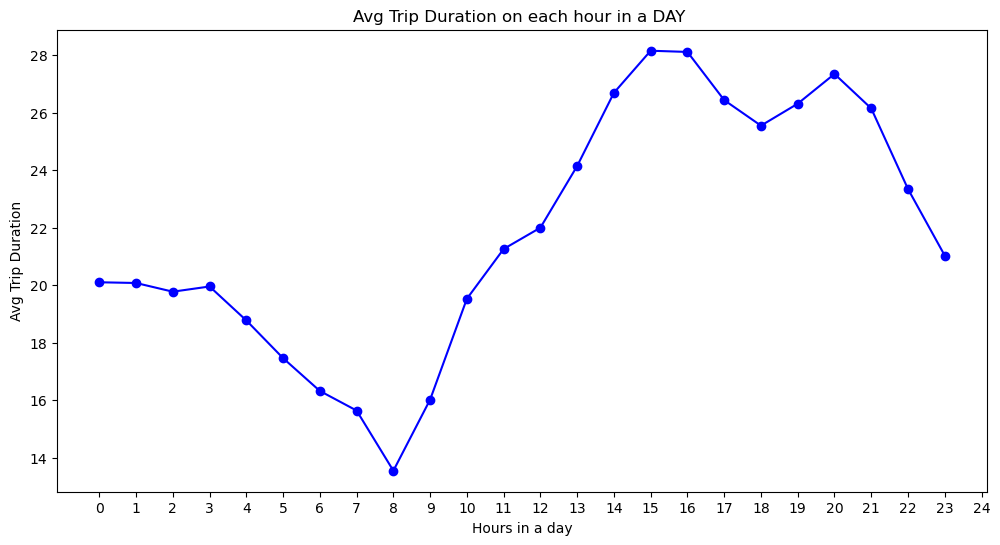

In [36]:
temp_data =  data.groupby("Phour")['Duration'].mean()
plt.figure(figsize=(12,6))
plt.plot(temp_data.index, temp_data.values,'b-o')
plt.xlabel("Hours in a day")
plt.ylabel("Avg Trip Duration")
plt.xticks(ticks=range(0,25))
plt.title("Avg Trip Duration on each hour in a DAY ")

# Observations
- From Total Pick ups every month in a year plot, More number of pick ups happen during January and February months.
- From Average trip duration in each month plot, The average trip duration is less during months: November, December, January, and February. Since this is the period of time in which South Korea experieces winter season. (This shows the trip duration is affected by the temperature)
- From Average trip duration in each day of a week plot, we can observe that the average trip duration is high during weekends.
- From Average trip duration on each hour in a day plot, The average trip duration is high during 15th, 16th and 20th hour of the day.

From above observations we can say that the temperature and time are influential factors for trip duration estimation.



In [37]:
data.shape

(8583860, 25)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8583860 entries, 0 to 8583859
Data columns (total 25 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Duration    int8   
 1   Distance    int64  
 2   PLong       float32
 3   PLatd       float32
 4   DLong       float32
 5   DLatd       float32
 6   Haversine   float32
 7   Pmonth      int8   
 8   Pday        int8   
 9   Phour       int8   
 10  Pmin        int8   
 11  PDweek      int8   
 12  Dmonth      int8   
 13  Dday        int8   
 14  Dhour       int8   
 15  Dmin        int8   
 16  DDweek      int8   
 17  Temp        float32
 18  Precip      float32
 19  Wind        float32
 20  Humid       float32
 21  Solar       float32
 22  Snow        float32
 23  GroundTemp  float32
 24  Dust        float32
dtypes: float32(13), int64(1), int8(11)
memory usage: 581.2 MB


In [39]:
continuous_data_columns = [column_name for column_name in data.columns if data[column_name].nunique()>40]
categorical_data_columns = [column_name for column_name in data.columns if column_name not in continuous_data_columns]
print(f"continuous data column: {continuous_data_columns}")
print(f"categorical data column: {categorical_data_columns}")

continuous data column: ['Duration', 'Distance', 'PLong', 'PLatd', 'DLong', 'DLatd', 'Haversine', 'Pmin', 'Dmin', 'Temp', 'Precip', 'Wind', 'Humid', 'Solar', 'Snow', 'GroundTemp', 'Dust']
categorical data column: ['Pmonth', 'Pday', 'Phour', 'PDweek', 'Dmonth', 'Dday', 'Dhour', 'DDweek']


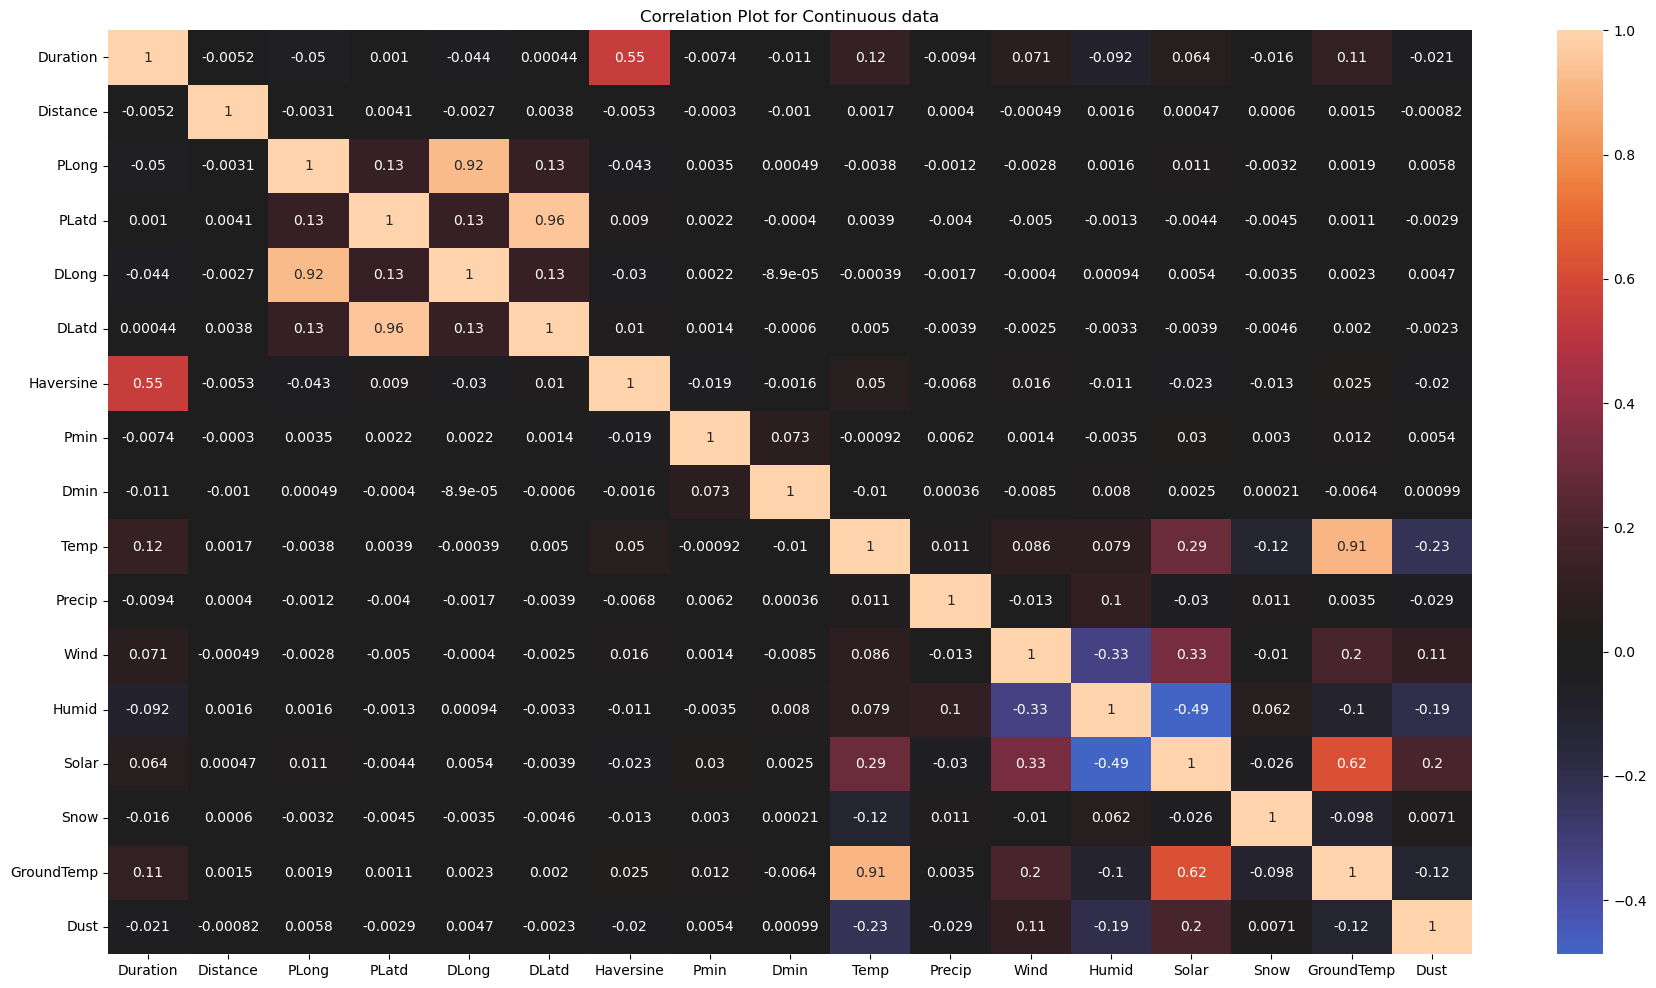

In [40]:
plt.figure(figsize = (22,12))
sns.heatmap(data[continuous_data_columns].corr(), annot = True, center = 0)
plt.title("Correlation Plot for Continuous data")
plt.show()

# Observations
- PLong and DLong are highly correlated, but these represent the pick up and drop off longitudes
- PLatd and DLatd are highly correlated, but these represent the pick up and drop off latitudes
- Temp and GroundTemp are highly correlated.

In [41]:
data.to_csv("./cleaned_seoul_bike_data.csv", index = False)

In [42]:
X = data.drop(columns=['Duration'])
y = data['Duration']

In [43]:
X

,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,128,37.591160,126.941330,37.583698,126.924965,1.663661,6,20,15,38,2,6,20,15,55,2,27.900000,0.0,3.6,45.0,3.04,0.0,50.000000,37.0
1,24,37.531811,127.080742,37.539139,127.070618,1.208654,12,1,19,31,5,12,1,19,41,5,6.800000,0.0,1.2,37.0,0.00,0.0,1.400000,50.0
2,32,37.552914,126.836571,37.548908,126.836563,0.445448,7,25,0,26,2,7,25,0,31,2,28.900000,0.0,2.2,66.0,0.00,0.0,28.299999,16.0
3,24,37.649021,127.076408,37.638649,127.066292,1.457206,8,8,10,14,2,8,8,10,26,2,31.600000,0.0,2.3,58.0,2.02,0.0,40.400002,18.0
4,10,37.573753,127.038536,37.567970,127.046890,0.977542,8,17,20,31,4,8,17,21,30,4,28.400000,0.0,1.7,40.0,0.00,0.0,28.200001,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8583855,8,37.522079,126.930367,37.539272,126.945915,2.352579,12,27,18,17,3,12,27,18,35,3,-9.300000,0.0,3.8,27.0,0.00,0.0,-3.200000,39.0
8583856,120,37.580406,127.044823,37.574852,127.040306,0.734748,8,25,23,11,5,8,25,23,18,5,22.900000,0.0,1.4,78.0,0.00,0.0,20.900000,10.0
8583857,10,37.505428,127.052872,37.511280,127.078239,2.330249,8,14,19,19,1,8,14,19,43,1,32.700001,0.0,2.2,56.0,0.33,0.0,33.799999,37.0
8583858,48,37.524120,126.936546,37.556789,126.935883,3.633102,6,12,17,57,1,6,12,18,28,1,26.400000,0.0,3.0,47.0,1.76,0.0,37.000000,17.0


In [44]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [45]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(6008702, 24) (6008702,)
(2575158, 24) (2575158,)


In [46]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [47]:
def rmse(y_true, predictions):
    return mean_squared_error(y_true, predictions)**0.5

def get_metrics(y_true, predictions):
    print(f"MAE:{mean_absolute_error(y_true,predictions)}")
    print(f"MSE:{mean_squared_error(y_true,predictions)}")
    print(f"RMSE:{rmse(y_true,predictions)}")
    print(f"R2 Score:{r2_score(y_true,predictions)}")

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
linear_model = LinearRegression()
linear_model.fit(scaled_X_train,y_train)

LinearRegression()

In [52]:
pred = linear_model.predict(scaled_X_test)
get_metrics(y_test,pred)

MAE:12.115624884677318
MSE:349.41667290117994
RMSE:18.692690360169664
R2 Score:0.3313371797476915


In [53]:
pred = linear_model.predict(scaled_X_train)
get_metrics(y_train,pred)

MAE:12.113979222586506
MSE:349.14991403347966
RMSE:18.685553618597435
R2 Score:0.33211075626314635


# XG Boost Regressor

In [54]:
from xgboost import XGBRegressor

In [55]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [56]:
preds = xgb_model.predict(X_test)
get_metrics(y_test ,preds)

MAE:2.7901787757873535
MSE:26.106582641601562
RMSE:5.109460112536506
R2 Score:0.9500410286172883


In [57]:
preds = xgb_model.predict(X_train)
get_metrics(y_train ,preds)

MAE:2.782742500305176
MSE:25.839069366455078
RMSE:5.083214471813586
R2 Score:0.9505724304251615


In [58]:
!pip install lightgbm

In [59]:
from lightgbm import LGBMRegressor

In [60]:
lgbm_model = LGBMRegressor(random_state=24,n_jobs=-1)

In [61]:
lgbm_model.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.456787 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2768
[LightGBM] [Info] Number of data points in the train set: 6008702, number of used features: 24
[LightGBM] [Info] Start training from score 23.122914


LGBMRegressor(n_jobs=-1, random_state=24)

In [62]:
pred = lgbm_model.predict(X_test)
get_metrics(y_test,pred)

MAE:4.799661145097423
MSE:71.05073830563343
RMSE:8.429160000001984
R2 Score:0.8640334284509377


In [63]:
Data_Path = "C://Users//Muskan//Downloads//cleaned_seoul_bike_data.csv"
data = pd.read_csv(Data_Path,
                  dtype={
                      'Duration':'int8',
                      'Distance':'int8',
                      'PLong':'float32',
                      'PLatd':'float32',
                      'DLong':'float32',
                      'DLatd':'float32',
                      'Haversine':'float32',
                      'Pmonth':'int8',
                      'Pday':'int8',
                      'Phour':'int8',
                      'Pmin':'int8',
                      'PDweek':'int8',
                      'Dmonth':'int8',
                      'Dday':'int8',
                      'Dhour':'int8',
                      'Dmin':'int8',
                      'DDweek':'int8',
                      'Temp':'float32',
                      'Precip':'float32',
                      'Wind':'float32',
                      'Humid':'float32',
                      'Solar':'float32',
                      'Snow':'float32',
                      'GroundTemp':'float32',
                      'Dust':'float32'                      
                  }
                  ).sample(frac=0.06).reset_index().drop(columns=['index'])
data.head()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,7,50,37.513950,127.030151,37.517635,127.022453,0.793015,10,14,12,19,6,10,14,12,26,6,17.200001,0.0,1.1,33.0,2.28,0.0,27.299999,74.0
1,3,88,37.526066,126.925537,37.528816,126.924530,0.318420,11,4,16,11,6,11,4,16,15,6,18.400000,0.0,3.2,25.0,1.05,0.0,18.500000,40.0
2,12,60,37.448936,127.054375,37.454399,127.062309,0.927103,7,21,15,9,5,7,21,15,22,5,36.500000,0.0,3.0,35.0,2.71,0.0,56.400002,49.0
3,4,108,37.558933,126.927116,37.564541,126.927071,0.623595,7,6,0,30,4,7,6,0,35,4,23.500000,0.0,1.9,65.0,0.00,0.0,22.000000,7.0
4,34,28,37.550659,126.849770,37.568577,126.824776,2.970426,9,27,2,42,3,9,27,3,16,3,15.700000,0.0,1.4,53.0,0.00,0.0,14.300000,5.0


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515032 entries, 0 to 515031
Data columns (total 25 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Duration    515032 non-null  int8   
 1   Distance    515032 non-null  int8   
 2   PLong       515032 non-null  float32
 3   PLatd       515032 non-null  float32
 4   DLong       515032 non-null  float32
 5   DLatd       515032 non-null  float32
 6   Haversine   515032 non-null  float32
 7   Pmonth      515032 non-null  int8   
 8   Pday        515032 non-null  int8   
 9   Phour       515032 non-null  int8   
 10  Pmin        515032 non-null  int8   
 11  PDweek      515032 non-null  int8   
 12  Dmonth      515032 non-null  int8   
 13  Dday        515032 non-null  int8   
 14  Dhour       515032 non-null  int8   
 15  Dmin        515032 non-null  int8   
 16  DDweek      515032 non-null  int8   
 17  Temp        515032 non-null  float32
 18  Precip      515032 non-null  float32
 19  Wi

In [65]:
X = data.drop(columns=['Duration'])
y = data['Duration']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(463528, 24) (463528,)
(51504, 24) (51504,)


In [67]:
from sklearn.ensemble import RandomForestRegressor

In [68]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [69]:
predictions = rf_model.predict(X_test)
get_metrics(y_test,predictions)

MAE:3.657886715225077
MSE:57.168172404961346
RMSE:7.560963721970986
R2 Score:0.8920747001629861


In [70]:
predictions = rf_model.predict(X_train)
get_metrics(y_train,predictions)

MAE:1.371511354325131
MSE:8.191355203011181
RMSE:2.8620543675847916
R2 Score:0.9843385680141542


In [71]:
n_estimators = [10,20,30,40]
min_samples_split = [2,3,4,5]
min_samples_leaf = [2,3,4,5]
random_grid = {'n_estimators':n_estimators,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf}
random_grid

{'n_estimators': [10, 20, 30, 40],
 'min_samples_split': [2, 3, 4, 5],
 'min_samples_leaf': [2, 3, 4, 5]}